### Imports

Importing the ANN from the NeuralNetwork class
Importing the matplotlib library for plotting graphs
Importing numpy for mathematical calculations
Importing seaborn and sklearn for the confusion matrices

In [1]:
# IMPORT ALL NECESSARY PACKAGES AND MODULES

from NeuralNetwork import ANN
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Pre-Processing The Data

We first divide the data into 3 sets:

- Training Set
- Validation Set
- Test Set

While training the model, the Training Set will be used alongside the Validation Set to measure its accuracy.

Finally, after the model has been trained, the Test Set will be utilized to measure how the model performs on an unseen set of data.

In [2]:
# PRE-PROCESSING

# Reading the data
features = np.genfromtxt("data/features.txt", delimiter=",")
targets = np.genfromtxt("data/targets.txt", delimiter=",")
labels = np.unique(targets)

# Splitting the data into 3 sets:
# 15% of data as the test set
test_fraction = 0.15
# 15% of data as the validation set
validation_fraction = 0.15
# 70% of data as the training set
training_fraction = 1 - test_fraction - validation_fraction

# Calculate number of samples for each split
n_samples = features.shape[0]
n_train = int(n_samples * training_fraction)
n_val = int(n_samples * validation_fraction)
n_test = n_samples - n_train - n_val

# Split features and targets into train, val, and test sets
x_train = features[:n_train]
y_train = targets[:n_train]

x_val = features[n_train:n_train+n_val]
y_val = targets[n_train:n_train+n_val]

x_test = features[n_train+n_val:]
y_test = targets[n_train+n_val:]

### Training: Less Computation Power

Since our input data has 10 features and they must be classified into 1 of the 7 target classes, we can use the following:

- Input Layer Neurons = 10
- Output Layer Neurons = 7
- Learning Rate = 0.01
- Epoch = 20

The learning rate is the standard learning rate used by other similar models.
The epoch is the number of times the model iterates through the entire data to update the weights in order get the predictions more accurate

The number of hidden neurons can be changed to allow more accurate pathways the data can take when in the model. This leads to more accuracy weights and this ensures a much better accuracy in prediction.

The training below uses early stopping to stop the model from further training if an accuracy of 85% has been reached.

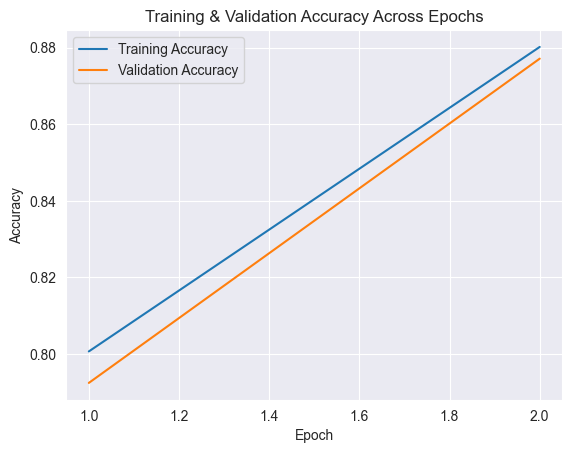

Best Accuracy Of Model With Early Stopping:  0.8771428571428571


In [3]:
# TRAINING THE MODEL

# Training the model with early stopping
ann = ANN(num_features=10, hidden_neurons=15, target_classes=7, learning_rate=0.01, epoch=20)
val_acc = ann.train(x_train, y_train, x_val, y_val, True, True)
print("Best Accuracy Of Model With Early Stopping: ", val_acc)

### Training: More Accuracy

The training below does not use early stopping, in order to try to get the model to hit the highest accuracy possible for predictions. This enables a much better prediction accuracy.

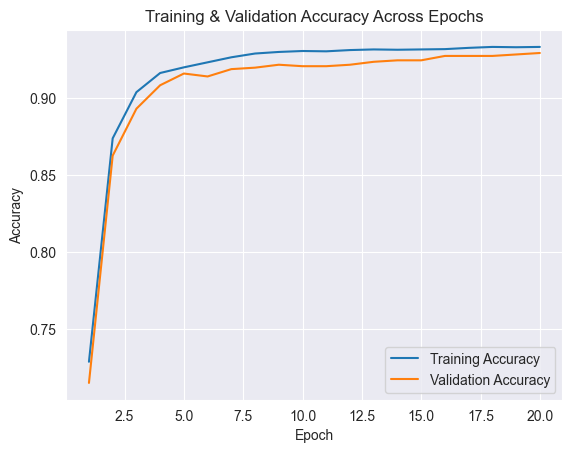

Best Accuracy Of Model:  0.9295238095238095


In [4]:
# TRAINING THE MODEL

# Training the model without early stopping
ann = ANN(num_features=10, hidden_neurons=15, target_classes=7, learning_rate=0.01, epoch=20)
val_acc = ann.train(x_train, y_train, x_val, y_val, True, False)
print("Best Accuracy Of Model: ", val_acc)

### Testing

Now that the model has been trained, it can be tested on the unseen test set of data. The graphs show how accurate the model was.

Accuracy: 0.9161904761904762


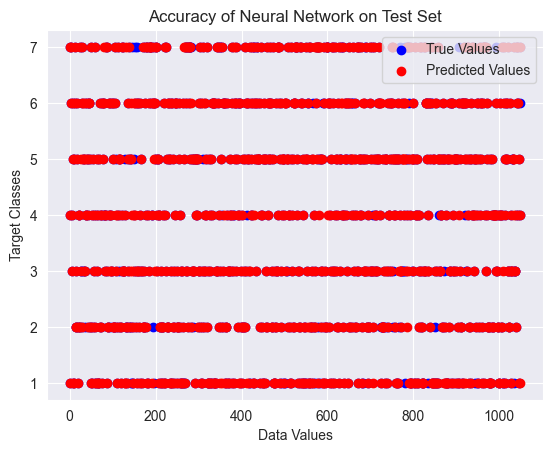

In [5]:
# TESTING THE MODEL

y_pred = ann.predict(x_test)

# Compute the accuracy of the model
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

# Plot the predicted values against the true values
plt.xlabel('Data Values')
plt.ylabel('Target Classes')
plt.title('Accuracy of Neural Network on Test Set')
plt.scatter(range(len(y_test)), y_test, c='b', label='True Values')
plt.scatter(range(len(y_pred)), y_pred, c='r', label='Predicted Values')
plt.legend()
plt.show()